# Chest-prediction - V2


## Setup

In [170]:
import numpy as np

In [171]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [172]:
AUTOTUNE = tf.data.AUTOTUNE

## Download and inspect the dataset

### Retrieve the images

Before you start any training, you'll need to download the dataset. I already resized the original dataset of the images to pass from 45GB to 3GB.

In [173]:
import os
from pathlib import Path

project_name = "chest-predictor"
username = os.environ.get('USER')

#Set variables (origin url, destination folder, folder name)
data_url = 'https://storage.googleapis.com/chest-predictor-data/resized_dataset.zip'
data_dir = f"/Users/{username}/code/sachamagier/{project_name}/raw_data"
data_fname = 'resized_dataset.zip'


#Downloading the dataset
data_root_orig = tf.keras.utils.get_file(
    fname=os.path.join(data_dir, data_fname),
    origin=data_url
)

Unzip the dataset download from GCS

** **Uncomment the block below if you need to unzip the file** **

In [174]:
import zipfile

#Extract the dataset
with zipfile.ZipFile(data_root_orig, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

In [175]:
#Set the new data_root
data_root = Path(os.path.join(data_dir, 'resized_dataset'))
print(data_root)

/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset


In [176]:
#This remove the '__MACOSX' file that is created on Mac Laptops
import shutil

if Path(os.path.join(data_dir, "__MACOSX")).is_dir():
    # remove the __MACOSX folder if it exists
    shutil.rmtree("../raw_data/__MACOSX")

In [177]:
#Get all image paths
all_image_paths = [str(path) for path in (data_root/"images"/"set_full").iterdir()]

In [178]:
image_count = len(all_image_paths)
image_count

112120

** **Uncomment this block below if if it's the first time you download and unzip the dataset and didn't get a len(all_image_paths) of 111601 - it will find all (256,256,4) images and delete them** **

In [179]:
from PIL import Image

# specify your dataset directory
data_directory = data_root/"images"/"set_full"

# list to store the names of the images to be removed
images_to_remove = []

# iterate over all files in the dataset directory
for filename in os.listdir(data_directory):
    if filename.endswith(".png"):  # make sure it's a png file
        file_path = os.path.join(data_directory, filename)
        image = Image.open(file_path)  # load the image with Pillow

        # convert the image to a numpy array to check its shape
        image_array = np.array(image)

        # check the shape of the image
        if image_array.shape == (256, 256, 4):
            images_to_remove.append(filename)  # add the filename to the list if it's to be removed

# print the names of the images to be removed
print("Images to be removed: ", images_to_remove)

# uncomment the following lines if you're sure about the images to be removed
for filename in images_to_remove:
    os.remove(os.path.join(data_directory, filename))


Images to be removed:  ['00027784_006.png', '00000497_000.png', '00030323_020.png', '00007188_006.png', '00006993_000.png', '00004438_004.png', '00001280_003.png', '00006214_000.png', '00004281_003.png', '00007041_000.png', '00003215_000.png', '00004770_000.png', '00005496_000.png', '00001882_001.png', '00007174_001.png', '00028661_000.png', '00000122_000.png', '00001305_000.png', '00005722_002.png', '00000218_004.png', '00000579_000.png', '00007471_002.png', '00001055_002.png', '00014486_003.png', '00006763_003.png', '00004784_000.png', '00014419_001.png', '00003976_000.png', '00030798_000.png', '00001252_001.png', '00005813_000.png', '00000918_000.png', '00005394_000.png', '00021131_005.png', '00004072_000.png', '00003821_001.png', '00005568_000.png', '00004877_001.png', '00014426_000.png', '00005123_000.png', '00011963_001.png', '00000955_001.png', '00001532_000.png', '00003923_007.png', '00003923_005.png', '00007048_000.png', '00000210_000.png', '00001558_010.png', '00006109_000.pn

In [180]:
for filename in images_to_remove:
    file_path = os.path.join(data_directory, filename)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"{filename} deleted")
    else:
        print("The file does not exist")


The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does no

In [181]:
print(images_to_remove)

['00027784_006.png', '00000497_000.png', '00030323_020.png', '00007188_006.png', '00006993_000.png', '00004438_004.png', '00001280_003.png', '00006214_000.png', '00004281_003.png', '00007041_000.png', '00003215_000.png', '00004770_000.png', '00005496_000.png', '00001882_001.png', '00007174_001.png', '00028661_000.png', '00000122_000.png', '00001305_000.png', '00005722_002.png', '00000218_004.png', '00000579_000.png', '00007471_002.png', '00001055_002.png', '00014486_003.png', '00006763_003.png', '00004784_000.png', '00014419_001.png', '00003976_000.png', '00030798_000.png', '00001252_001.png', '00005813_000.png', '00000918_000.png', '00005394_000.png', '00021131_005.png', '00004072_000.png', '00003821_001.png', '00005568_000.png', '00004877_001.png', '00014426_000.png', '00005123_000.png', '00011963_001.png', '00000955_001.png', '00001532_000.png', '00003923_007.png', '00003923_005.png', '00007048_000.png', '00000210_000.png', '00001558_010.png', '00006109_000.png', '00014223_008.png',

In [182]:
Path(os.path.join(data_directory, filename))

PosixPath('/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00006825_000.png')

In [183]:
for filename in images_to_remove:
    if os.path.exists(os.path.join(data_directory, filename)):
        os.remove(os.path.join(data_directory, filename))
        print(f"{filename} deleted")
    else:
        print("The file does not exist")

The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does not exist
The file does no

In [184]:
#remove the images from the list in all image paths
all_image_paths = [path for path in all_image_paths if path.split("/")[-1] not in images_to_remove]

In [185]:
image_count = len(all_image_paths)
image_count

111601

In [186]:
all_image_paths[:10]

['/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00018805_001.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00005868_002.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00009663_000.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00022156_007.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00005395_004.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00006966_004.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00000324_013.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00007442_018.png',
 '/Users/sachamagier/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/se

### Inspect the images
Now let's have a quick look at a couple of the images, so you know what you're dealing with:

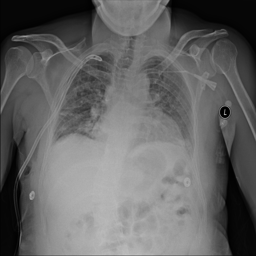

00000468_014.png



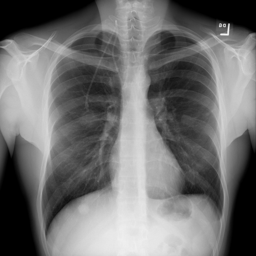

00009889_011.png



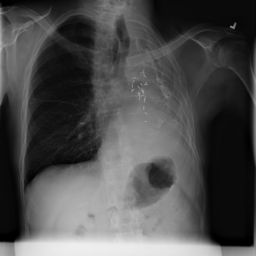

00025372_000.png



In [187]:
import IPython.display as display
import random

for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(os.path.basename(image_path))
    print()

### Determine the label for each image

Extracting the labels from the CSV

In [188]:
import pandas as pd
# Load labels
labels_df = pd.read_csv(data_root/"Data_Entry_2017.csv")
labels_df.set_index('Image Index', inplace=True)

In [214]:
labels_df.head(20)

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
Image Index,,,,,,,,,,,
00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN


In [190]:
# Create list of all image labels
all_image_labels = labels_df.loc[[os.path.basename(path) for path in all_image_paths], 'Finding Labels'].values

In [191]:
all_image_labels[:25]

array(['No Finding', 'No Finding', 'No Finding', 'Pneumonia',
       'No Finding', 'Pneumonia', 'No Finding', 'No Finding',
       'No Finding', 'No Finding', 'No Finding',
       'Atelectasis|Infiltration', 'Fibrosis', 'Infiltration',
       'No Finding', 'No Finding', 'No Finding', 'No Finding',
       'No Finding', 'Atelectasis', 'Cardiomegaly', 'Infiltration',
       'Consolidation', 'No Finding', 'No Finding'], dtype=object)

In [193]:
len(all_image_labels)

111601

#### Encoding the labels

Encoding the labels using *StringLookup*

In [194]:
#len of no finding
len([label for label in all_image_labels if label == 'No Finding'])

60016

In [221]:
no_finding_images = [os.path.basename(path) for path in all_image_paths if labels_df.loc[os.path.basename(path), 'Finding Labels'] == 'No Finding']

no_finding_images

['00018805_001.png',
 '00005868_002.png',
 '00009663_000.png',
 '00005395_004.png',
 '00000324_013.png',
 '00007442_018.png',
 '00003923_012.png',
 '00028483_007.png',
 '00024175_003.png',
 '00026987_001.png',
 '00025374_001.png',
 '00025380_000.png',
 '00002143_003.png',
 '00029676_004.png',
 '00015530_077.png',
 '00008745_019.png',
 '00027618_013.png',
 '00006590_000.png',
 '00007765_003.png',
 '00007791_002.png',
 '00010920_006.png',
 '00018168_000.png',
 '00030753_001.png',
 '00028613_000.png',
 '00025110_007.png',
 '00013648_003.png',
 '00016765_001.png',
 '00016791_000.png',
 '00007903_000.png',
 '00019860_005.png',
 '00011945_002.png',
 '00027514_001.png',
 '00014868_000.png',
 '00009805_003.png',
 '00006700_007.png',
 '00015160_005.png',
 '00019462_000.png',
 '00029319_000.png',
 '00010447_020.png',
 '00029666_010.png',
 '00016490_025.png',
 '00005910_002.png',
 '00021120_001.png',
 '00018989_000.png',
 '00015288_002.png',
 '00008211_000.png',
 '00015981_005.png',
 '00013956_00

In [222]:
all_image_paths = [path for path in all_image_paths if os.path.basename(path) not in no_finding_images]

len(all_image_paths)

51585